In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from matplotlib import pyplot as plt

# import some common libraries
import numpy as np
import os, json, cv2, random
from matplotlib.pyplot import imshow
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

ModuleNotFoundError: No module named 'detectron2'

/bin/bash: /home/ozkan/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


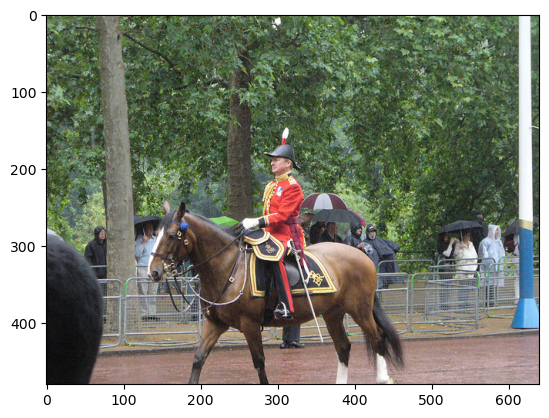

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[08/04 21:02:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [01:28, 2.00MB/s]                              
/home/ozkan/miniconda3/envs/venv/lib/python3.11/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24],
       device='cuda:0')
Boxes(tensor([[126.6023, 244.9034, 459.8298, 480.0000],
        [251.1053, 157.8112, 338.9758, 413.6354],
        [114.8525, 268.6900, 148.2362, 398.8156],
        [  0.8222, 281.0353,  78.6035, 478.4240],
        [ 49.3943, 274.1251,  80.1548, 342.9858],
        [561.2266, 271.5816, 596.2767, 385.2562],
        [385.9050, 270.3112, 413.7126, 304.0390],
        [515.9242, 278.3726, 562.2793, 389.3836],
        [335.2420, 251.9171, 414.7478, 275.9335],
        [350.9265, 269.2094, 386.0969, 297.9084],
        [331.6263, 230.9999, 393.2770, 257.2014],
        [510.7297, 263.2706, 570.9875, 295.9416],
        [409.0867, 271.8644, 460.5585, 356.8724],
        [506.8875, 283.3304, 529.9487, 324.0273],
        [594.5669, 283.4807, 609.0570, 311.4134]], device='cuda:0'))


In [ ]:
cfg.DATASETS.TRAIN[0]
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

namespace(name='coco_2017_train',
          json_file='datasets/coco/annotations/instances_train2017.json',
          image_root='datasets/coco/train2017',
          evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={1: 0,
                                             2: 1,
                                             3: 2,
                                             4: 3,
                                             5: 4,
                                             6: 5,
                                             7: 6,
                                             8: 7,
                                             9: 8,
                                             10: 9,
                                             11: 10,
                                             13: 11,
                                             14: 12,
                                             15: 13,
                                             16: 14,
                                   

In [ ]:
outputs["instances"]

Instances(num_instances=15, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[126.6023, 244.9034, 459.8298, 480.0000],
        [251.1053, 157.8112, 338.9758, 413.6354],
        [114.8525, 268.6900, 148.2362, 398.8156],
        [  0.8222, 281.0353,  78.6035, 478.4240],
        [ 49.3943, 274.1251,  80.1548, 342.9858],
        [561.2266, 271.5816, 596.2767, 385.2562],
        [385.9050, 270.3112, 413.7126, 304.0390],
        [515.9242, 278.3726, 562.2793, 389.3836],
        [335.2420, 251.9171, 414.7478, 275.9335],
        [350.9265, 269.2094, 386.0969, 297.9084],
        [331.6263, 230.9999, 393.2770, 257.2014],
        [510.7297, 263.2706, 570.9875, 295.9416],
        [409.0867, 271.8644, 460.5585, 356.8724],
        [506.8875, 283.3304, 529.9487, 324.0273],
        [594.5669, 283.4807, 609.0570, 311.4134]], device='cuda:0')), scores: tensor([0.9997, 0.9957, 0.9915, 0.9882, 0.9861, 0.9839, 0.9769, 0.9717, 0.9062,
        0.9037, 0.8869, 0.8576, 0.6589, 0.5888, 0.576

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [ ]:
vis_output = v.draw_sem_seg(sem_seg, area_threshold=0, alpha=0.8)

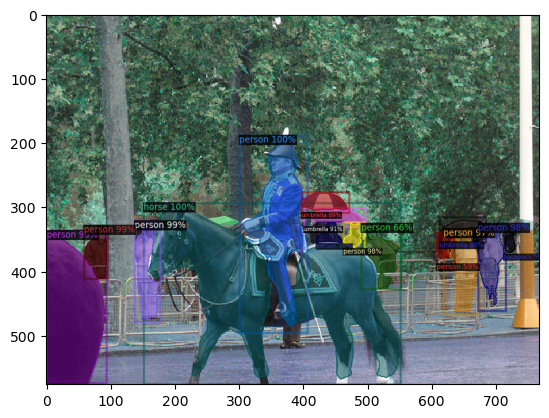

In [ ]:
plt.imshow(out.get_image()[:, :, ::-1])

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io, transform


# use bfloat16 for the entire notebook
torch.autocast(device_type="cuda", dtype=torch.bfloat16).__enter__()

if torch.cuda.get_device_properties(0).major >= 8:
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True

In [4]:
def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask 
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0,0,1,0.4), thickness=1) 

    ax.imshow(img)

In [6]:
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator


sam2_checkpoint = "/home/ozkan/segment-anything-2/checkpoints/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

sam2 = build_sam2(model_cfg, sam2_checkpoint, device ='cuda', apply_postprocessing=False)

mask_generator = SAM2AutomaticMaskGenerator(sam2)

In [ ]:
image = Image.open('/home/ozkan/segment-anything-2/notebooks/images/cars.jpg')
image = np.array(image.convert("RGB"))

In [7]:
img_np = io.imread("/mnt/e/Medical/mri/data_for_train/brain2/no_tumor/image(200).jpg")
if len(img_np.shape) == 2:
    img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
else:
    img_3c = img_np
H, W, _ = img_3c.shape

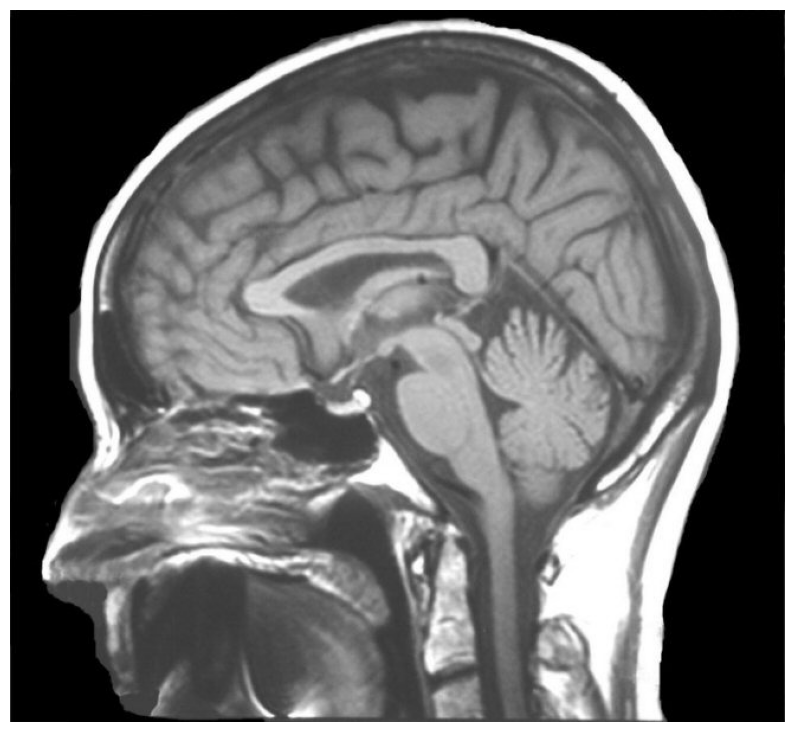

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(img_3c)
plt.axis('off')
plt.show()

In [9]:
masks = mask_generator.generate(img_3c)

In [10]:
print(len(masks))
print(masks[0].keys())

1
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


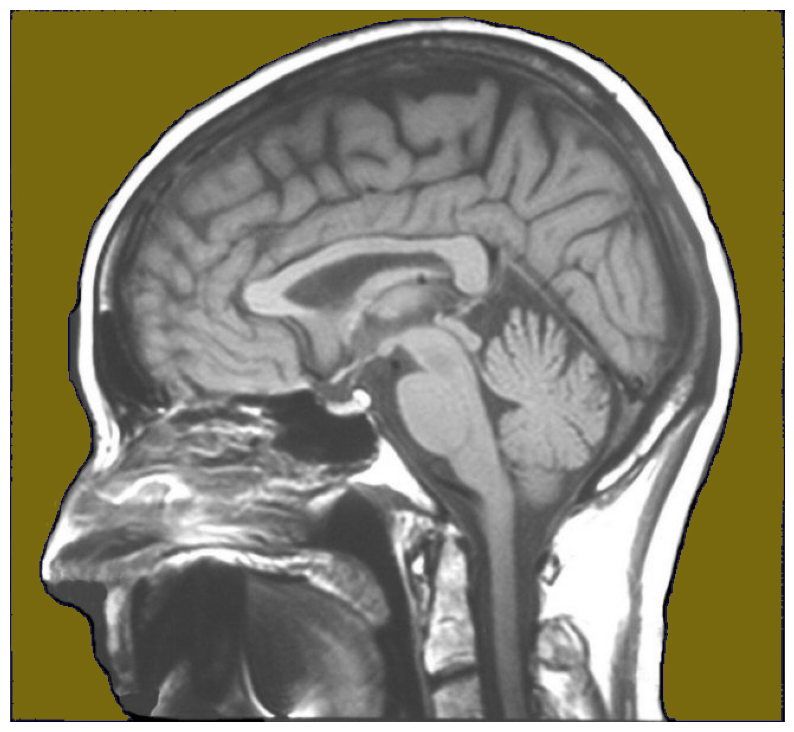

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(img_3c)
show_anns(masks)
plt.axis('off')
plt.show() 

In [12]:
mask_generator_2 = SAM2AutomaticMaskGenerator(
    model=sam2,
    points_per_side = 256,  # Very high density for the finest details
    points_per_batch = 512,  # More points per batch for thorough segmentation
    pred_iou_thresh = 0.7,  # Balanced IoU threshold for quality masks
    stability_score_thresh = 0.95,  # High stability score threshold for the most stable masks
    stability_score_offset = 1.0,
    mask_threshold = 0.0,
    box_nms_thresh = 0.7,
    crop_n_layers = 3,  # More layers for multi-level cropping
    crop_nms_thresh = 0.7,
    crop_overlap_ratio = 512 / 1500,
    crop_n_points_downscale_factor = 2,  # Adjusted for better point distribution
    min_mask_region_area = 20,  # Small region processing to remove artifacts
    output_mode = "binary_mask",
    use_m2m = True,  # Enable M2M refinement
    multimask_output = True,
)

In [13]:
masks2 = mask_generator_2.generate(img_3c)

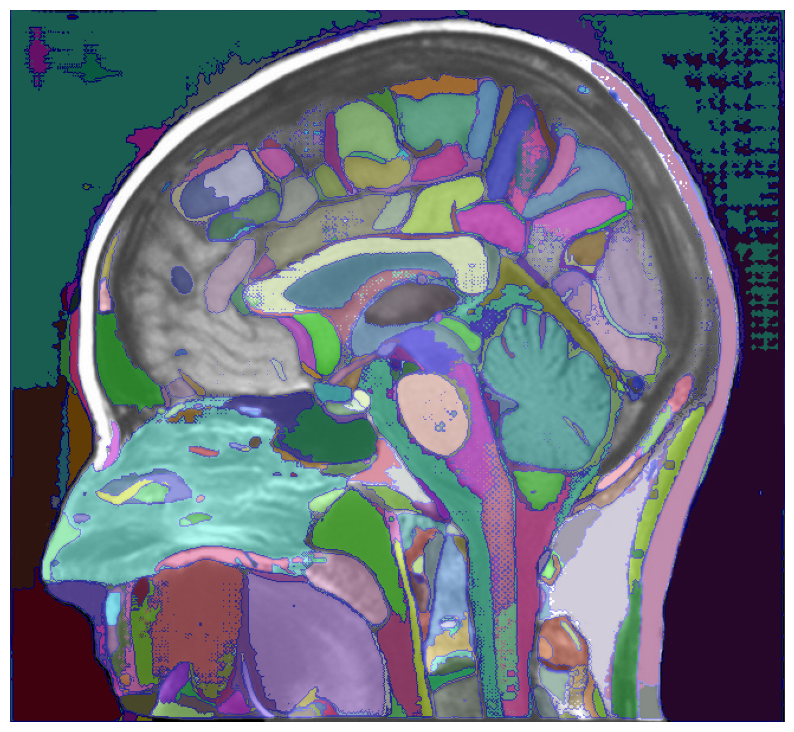

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_3c)
show_anns(masks2)
plt.axis('off')
plt.show()